In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
train_data = pd.read_csv("/content/train_ctrUa4K.csv")
test_data = pd.read_csv("/content/test_lAUu6dG.csv")

In [ ]:
train_org=train_data.copy()
test_org=test_data.copy()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_data.shape

(614, 13)

In [ ]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

In [ ]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [ ]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

In [ ]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
test_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
test_data.shape

(367, 12)

In [ ]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
train_data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [ ]:
train_data['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Gender'>

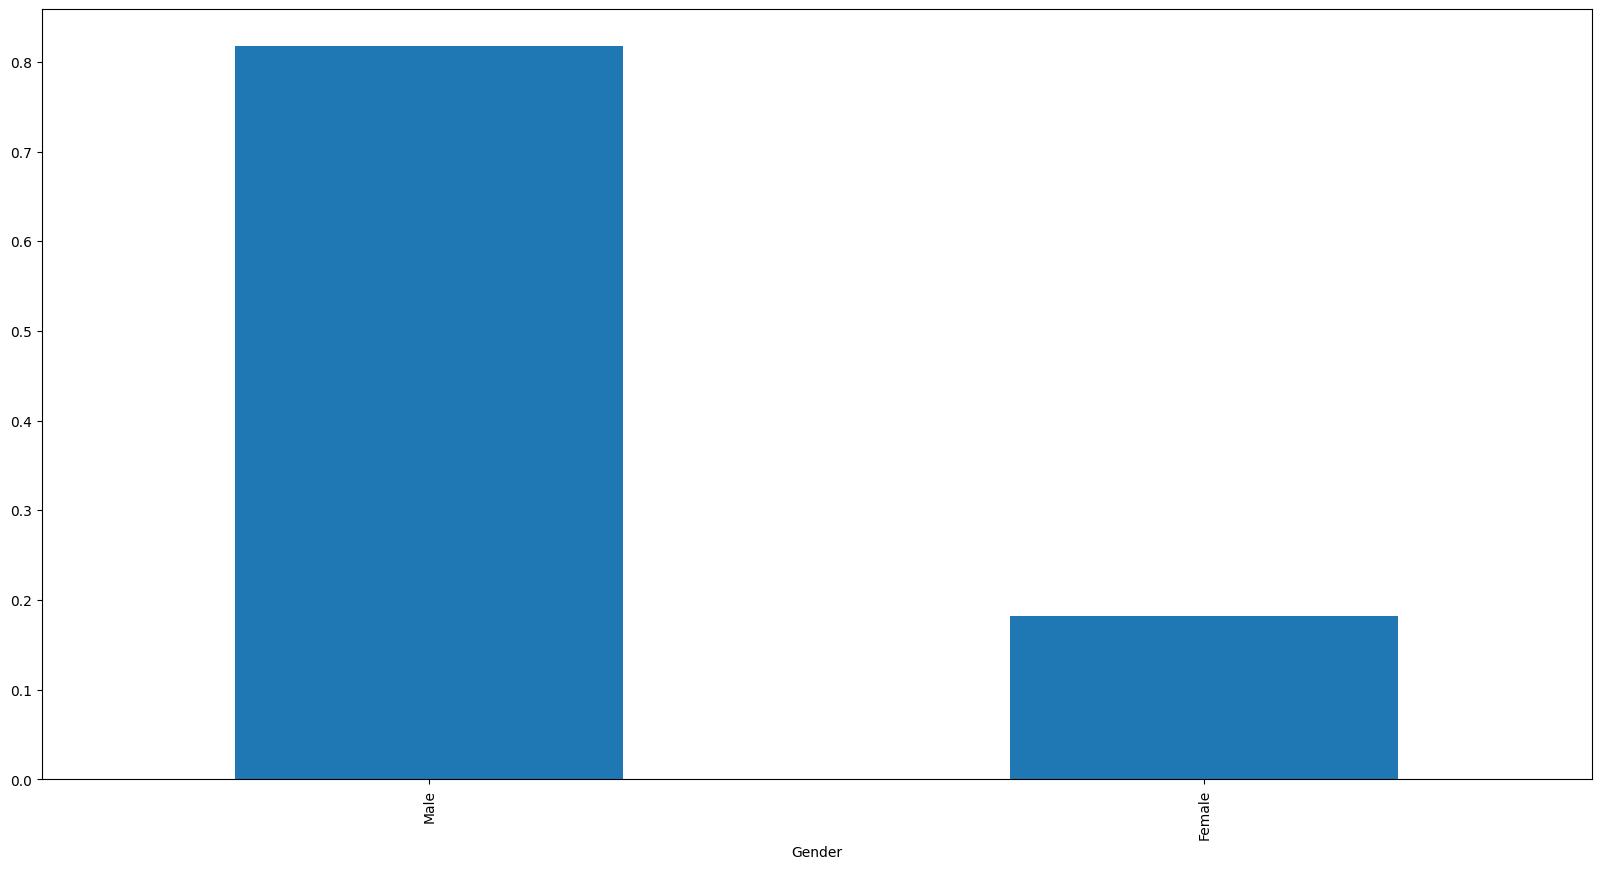

In [ ]:
train_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10))

80%are male applicants

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: xlabel='Married'>

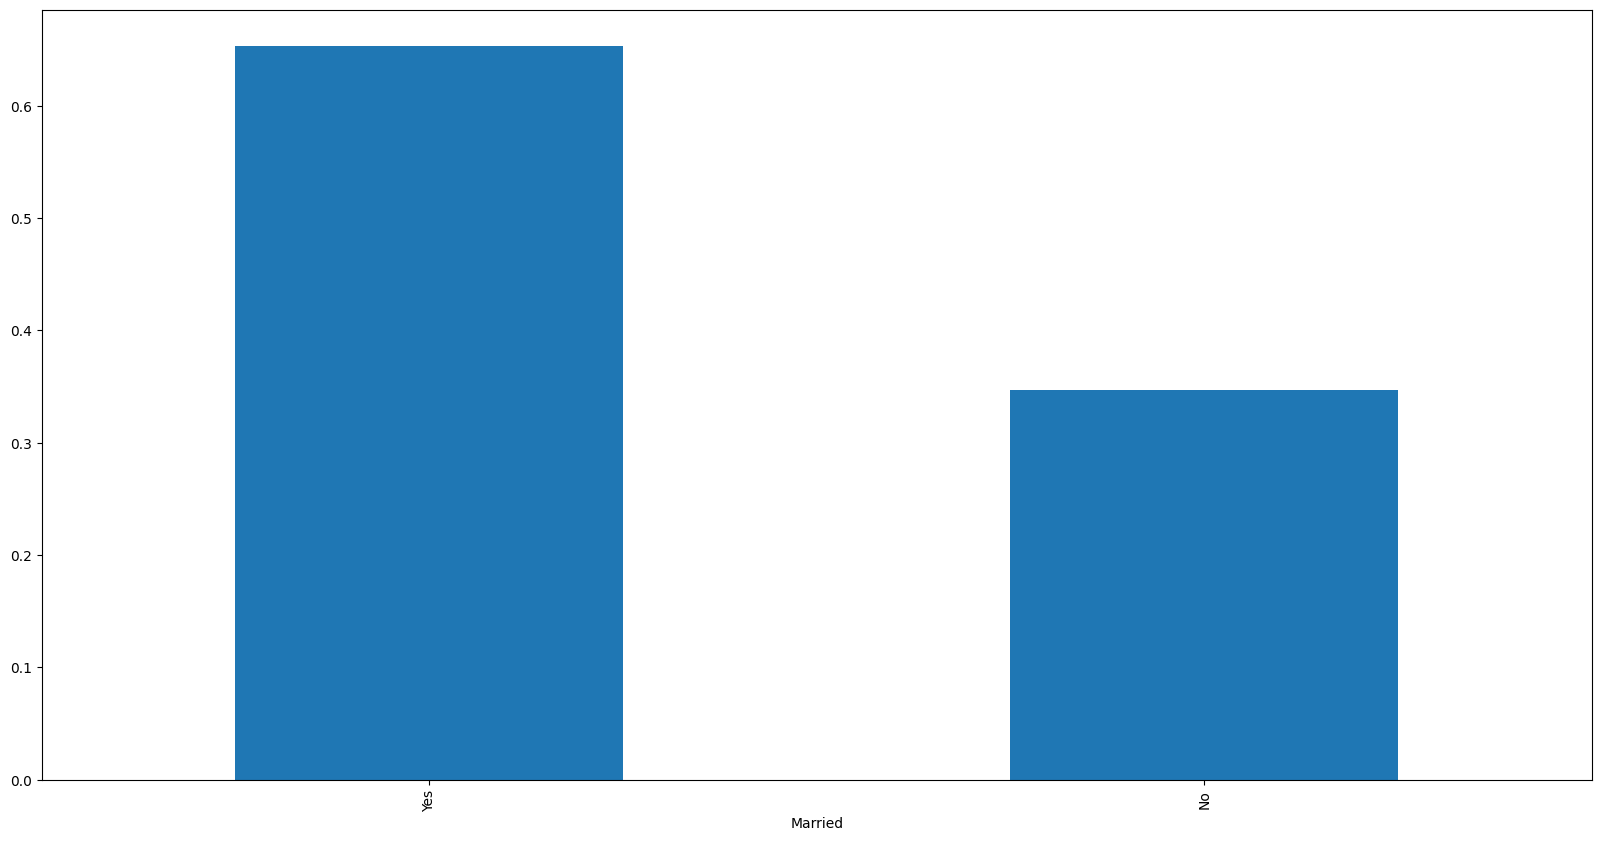

In [ ]:
train_data['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10))

<Axes: xlabel='Gender'>

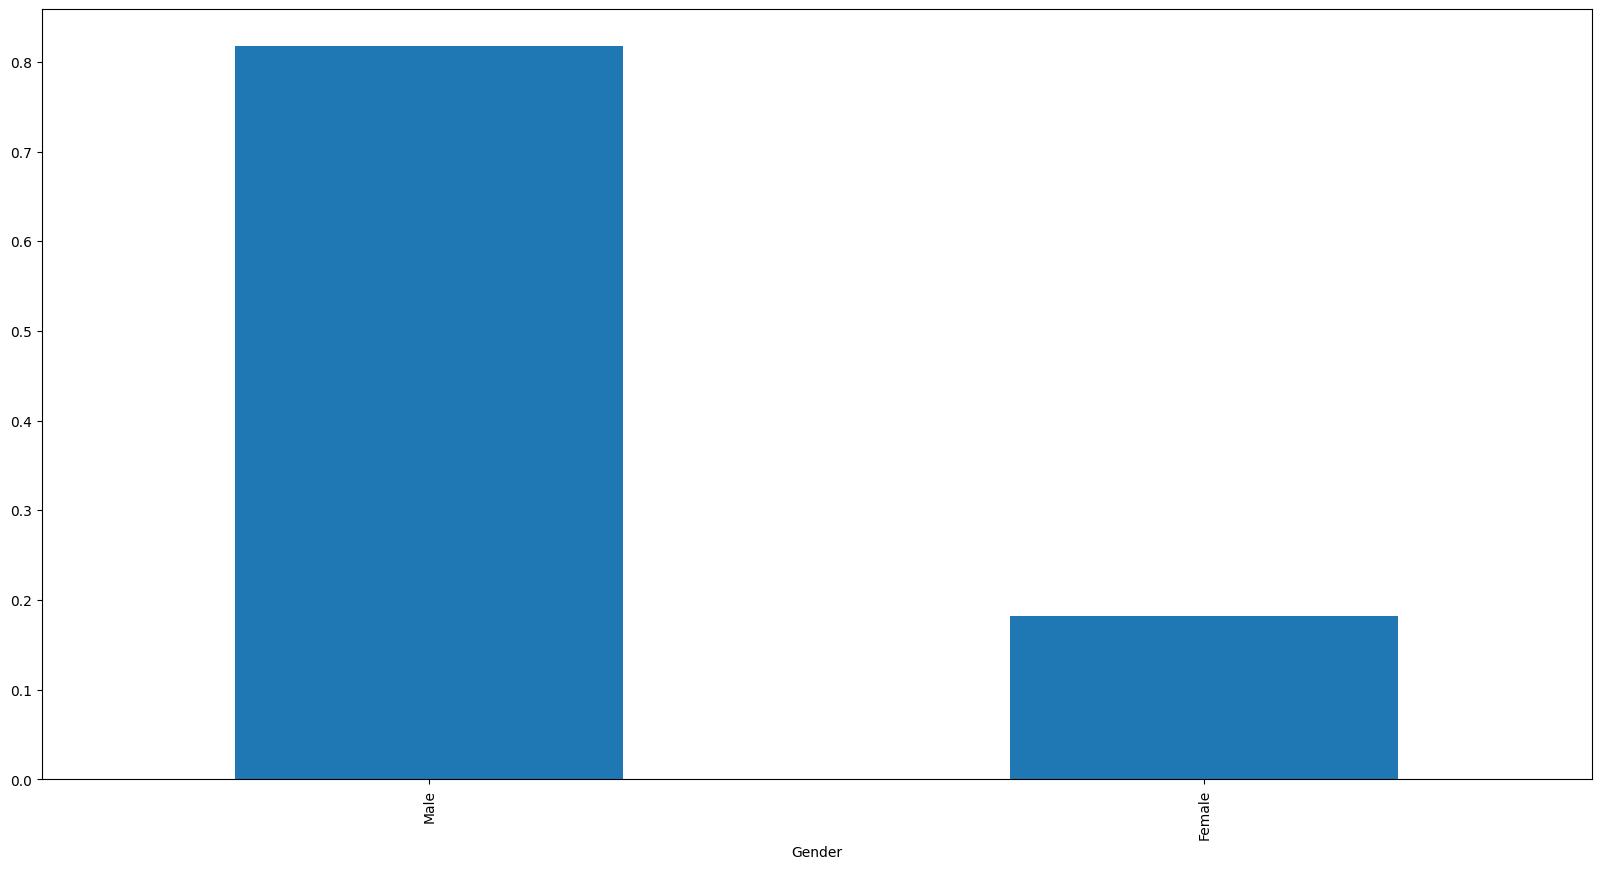

In [ ]:
train_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10))

65% is married applicant

<Axes: xlabel='Self_Employed'>

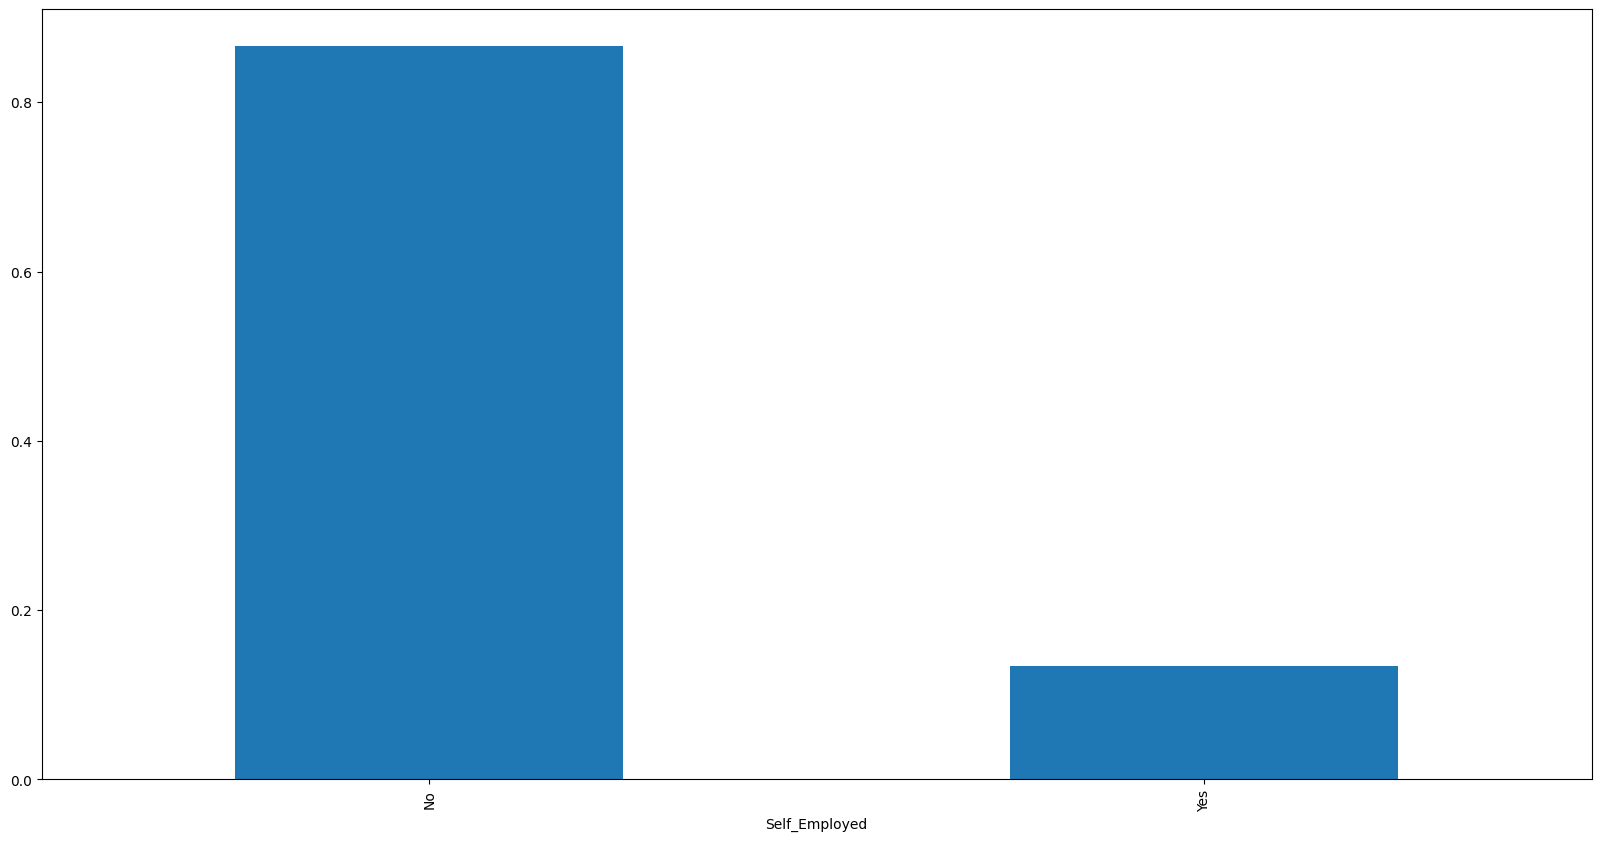

In [ ]:
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10))

15% are self employed

<Axes: xlabel='Credit_History'>

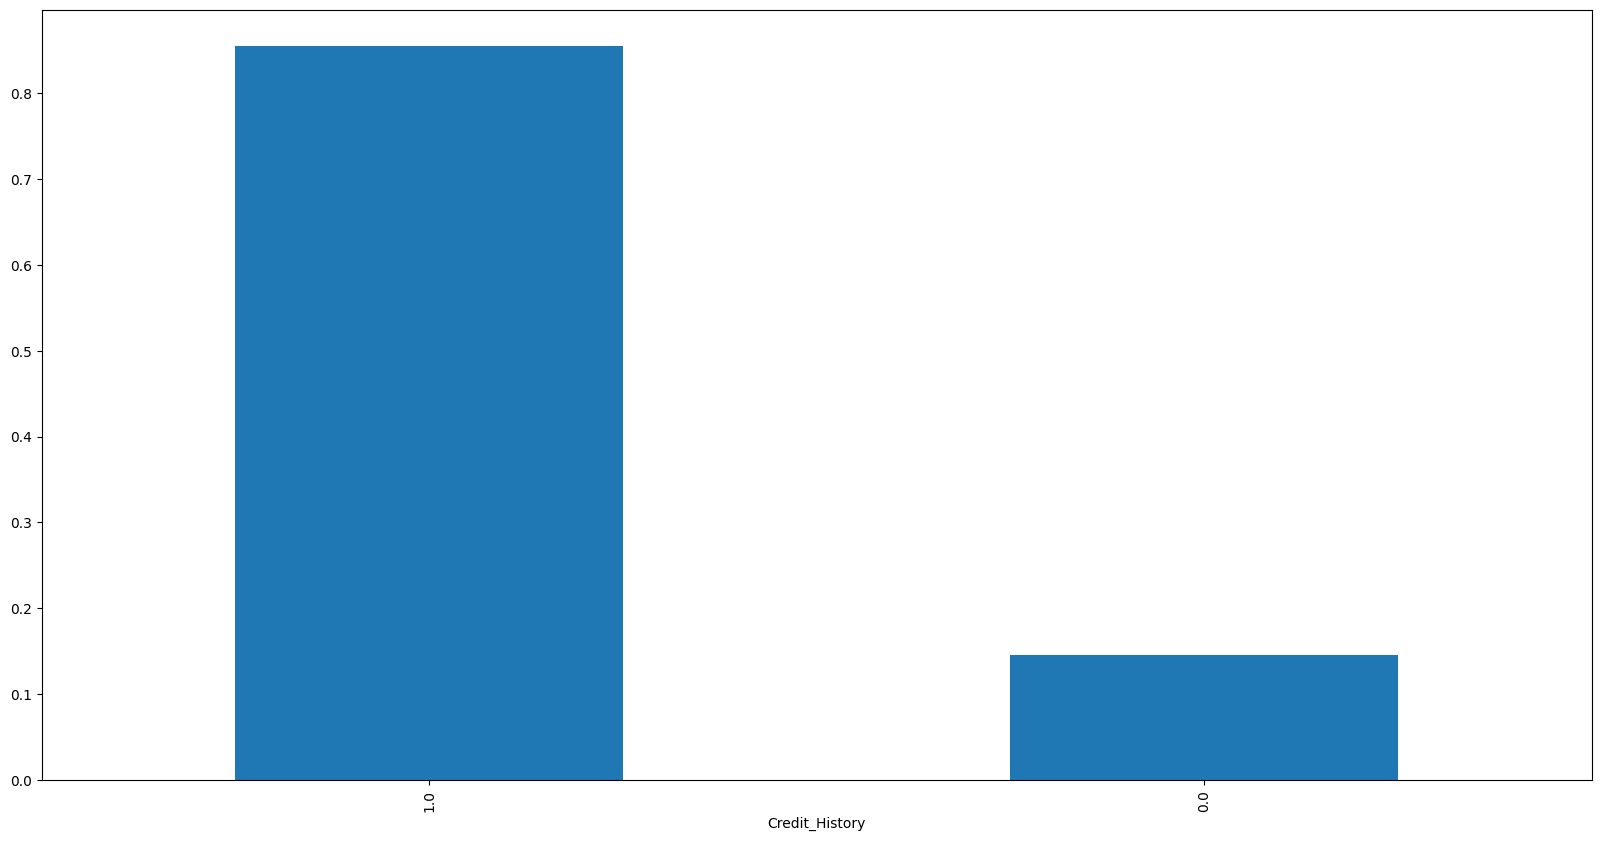

In [ ]:
train_data['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10))

85% have good credit history

<Axes: xlabel='Dependents'>

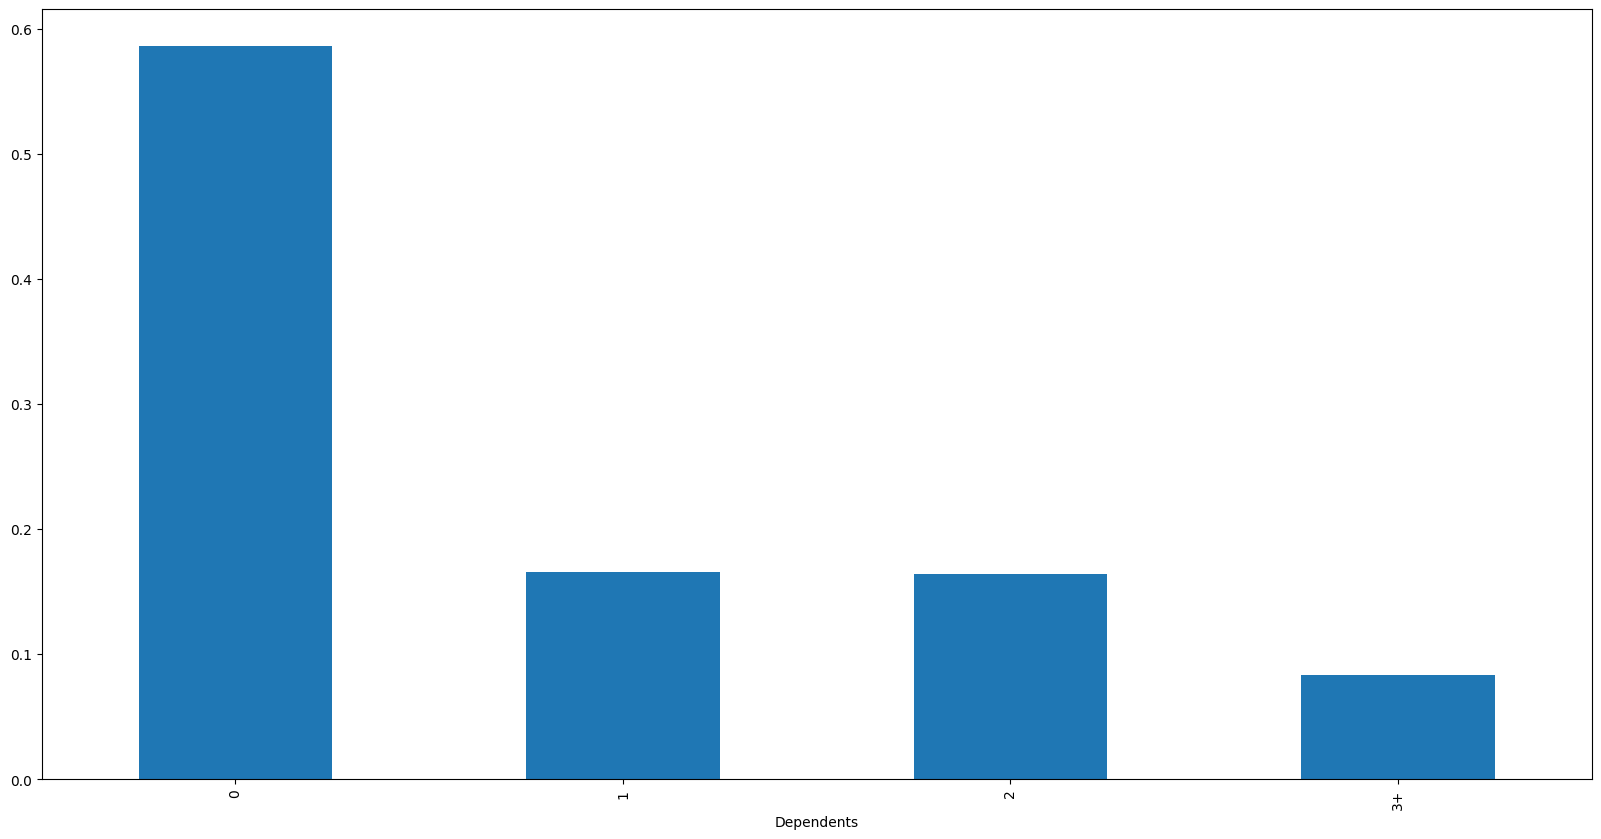

In [ ]:
train_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10))

More applicants doesn't have dependents

<Axes: xlabel='Education'>

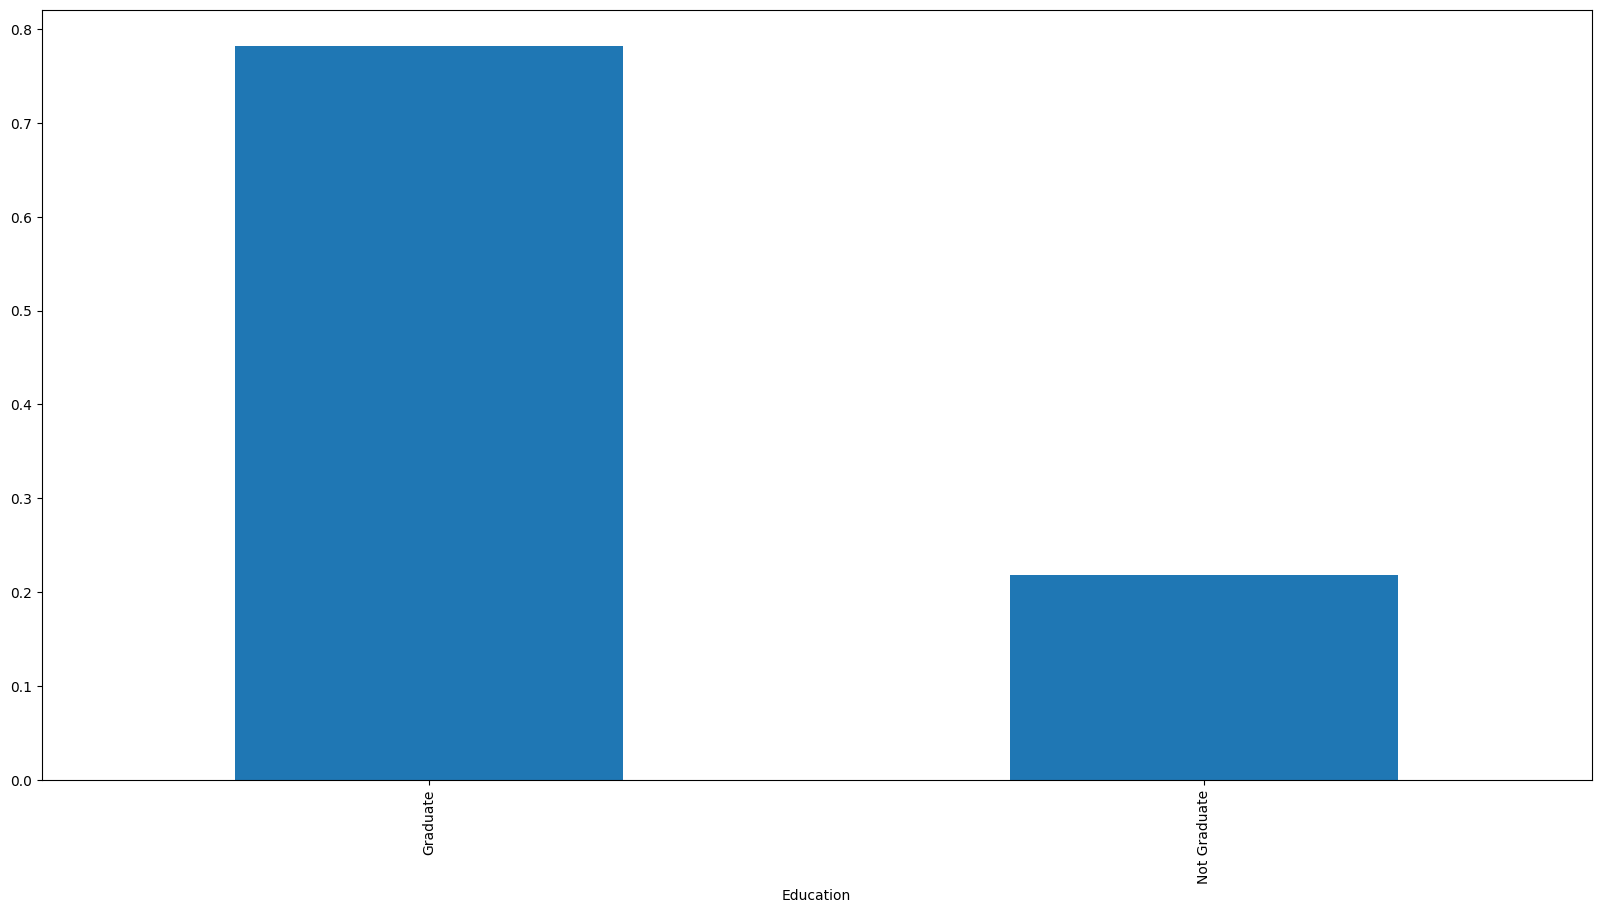

In [ ]:
train_data['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10))

78% are gratuated

<Axes: xlabel='Property_Area'>

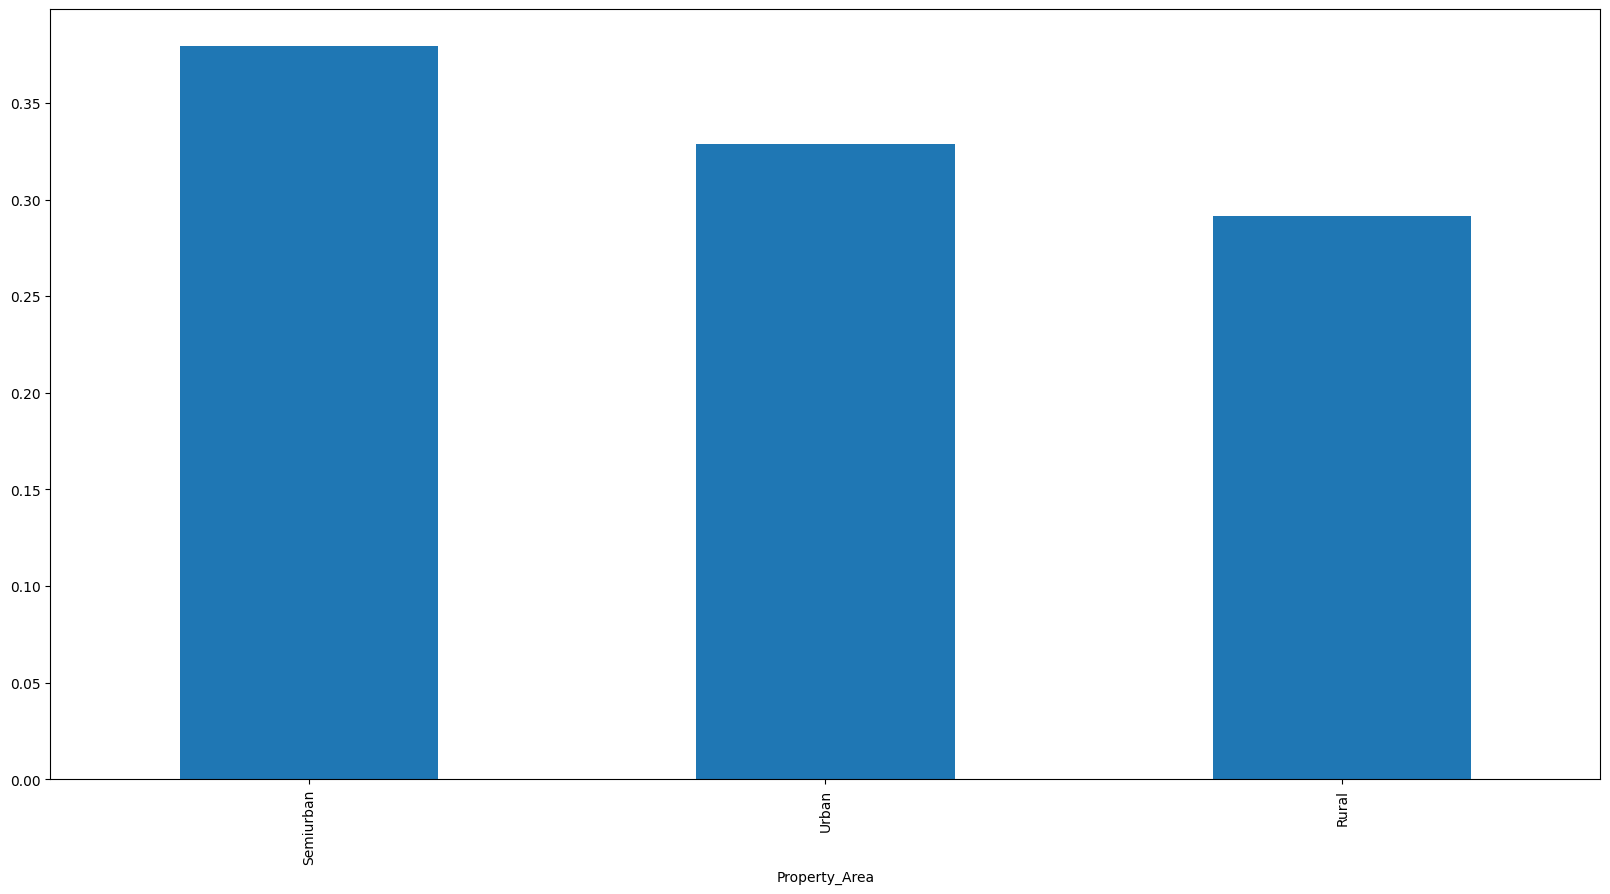

In [ ]:
train_data['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10))

Most of the applicants are from semi urban area

In [ ]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

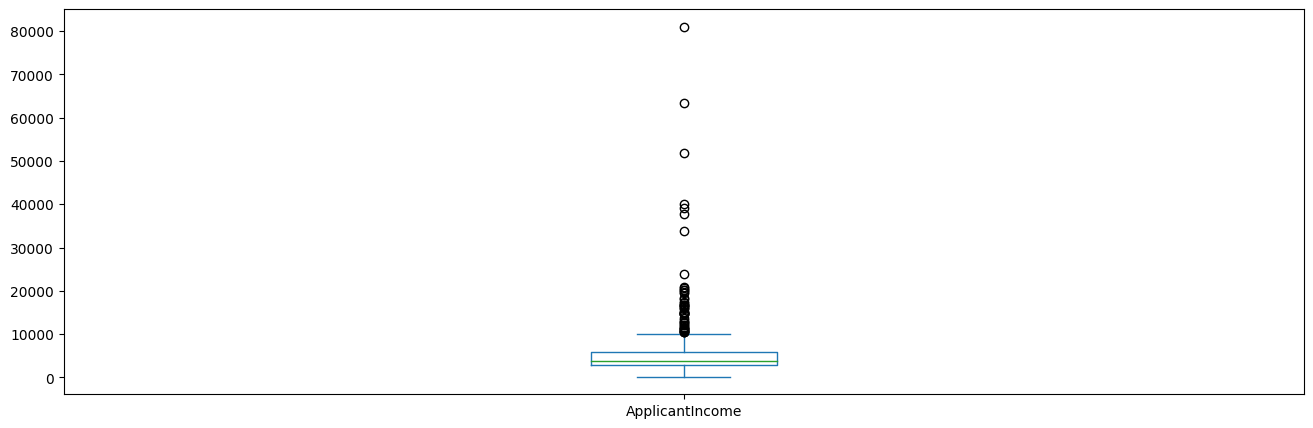

In [ ]:
train_data['ApplicantIncome'].plot.box(figsize=(16, 5))
plt.show()

<ipython-input-37-ceedb80aaff7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['ApplicantIncome'])


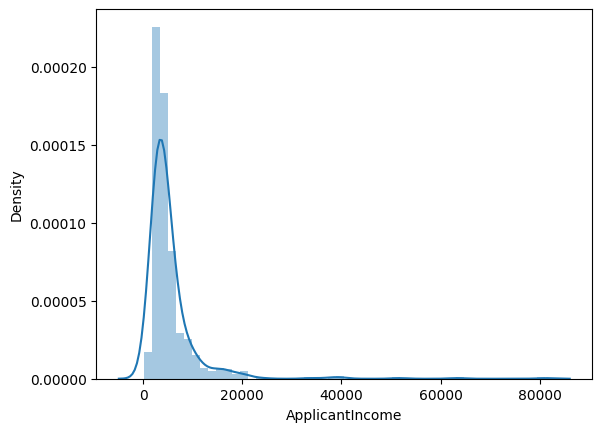

In [ ]:

sns.distplot(train_data['ApplicantIncome'])
plt.show()

<ipython-input-38-10da43ddbf62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['CoapplicantIncome'])


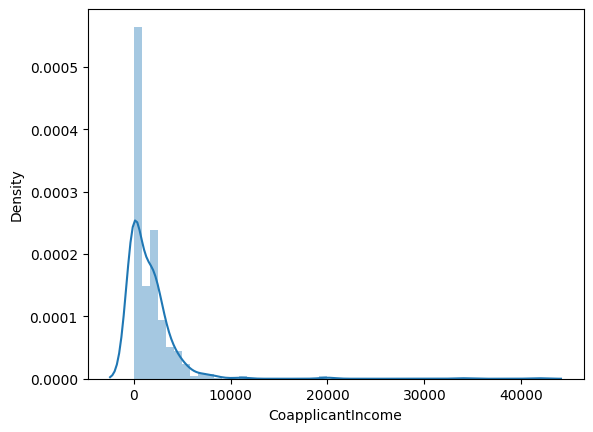

In [ ]:

sns.distplot(train_data['CoapplicantIncome'])
plt.show()

<ipython-input-39-d97080c5cc8e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['LoanAmount'])


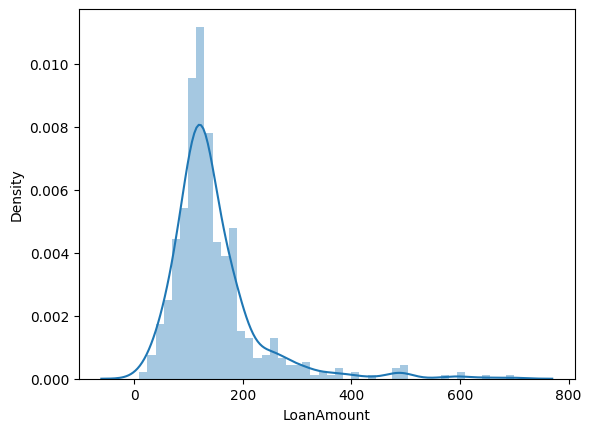

In [ ]:

sns.distplot(train_data['LoanAmount'])
plt.show()

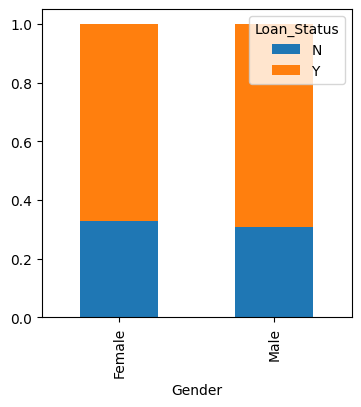

In [ ]:

Gender=pd.crosstab(train_data['Gender'],train_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

The approval and non approval for both gender is same

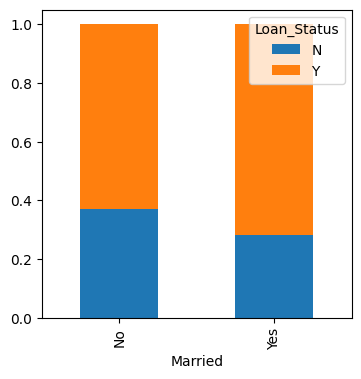

In [ ]:
Married=pd.crosstab(train_data['Married'],train_data['Loan_Status'])
Dependents=pd.crosstab(train_data['Dependents'],train_data['Loan_Status'])
Education=pd.crosstab(train_data['Education'],train_data['Loan_Status'])
Self_Employed=pd.crosstab(train_data['Self_Employed'],train_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

The approval of married  applicant is high

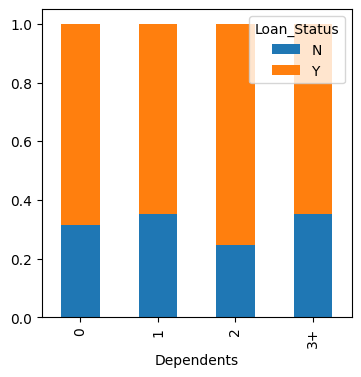

In [ ]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

the aproval for applicants with 2 dependents are slightly high

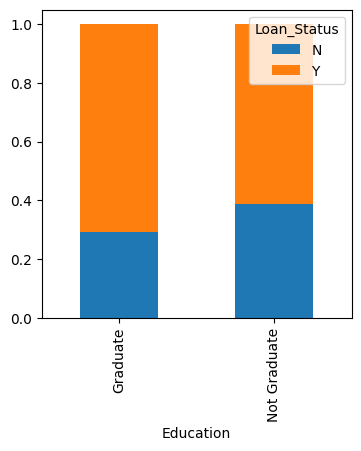

In [ ]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

educated has high aproval

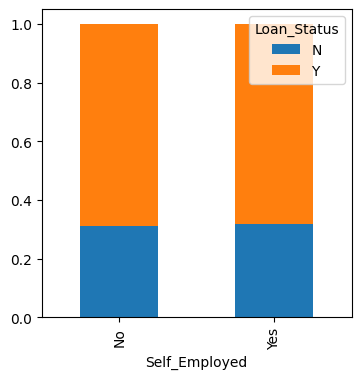

In [ ]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

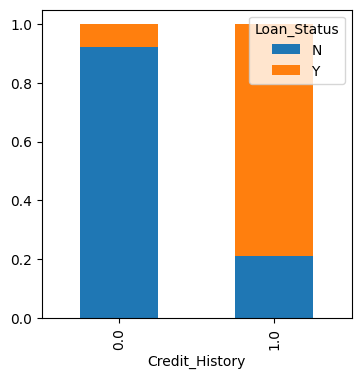

In [ ]:
Credit_History=pd.crosstab(train_data['Credit_History'],train_data['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

applicatns with credit score 1 gets aproved

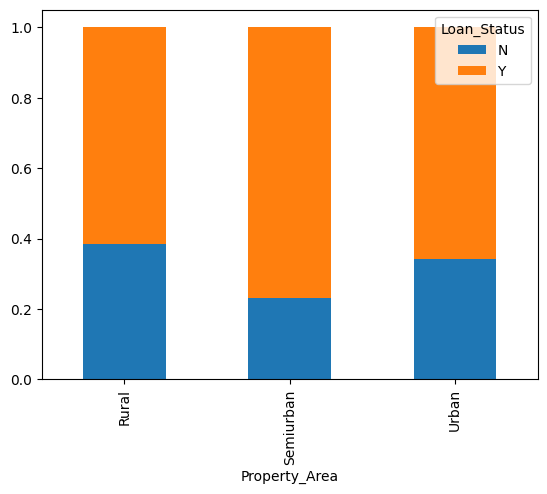

In [ ]:
Property_Area=pd.crosstab(train_data['Property_Area'],train_data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

aplicants in semiurban get aproved

In [ ]:
train_data['Dependents'].replace('3+', 3,inplace=True)
test_data['Dependents'].replace('3+', 3,inplace=True)
train_data['Loan_Status'].replace('N', 0,inplace=True)
train_data['Loan_Status'].replace('Y', 1,inplace=True)

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
train_data.drop(['Loan_ID'],axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


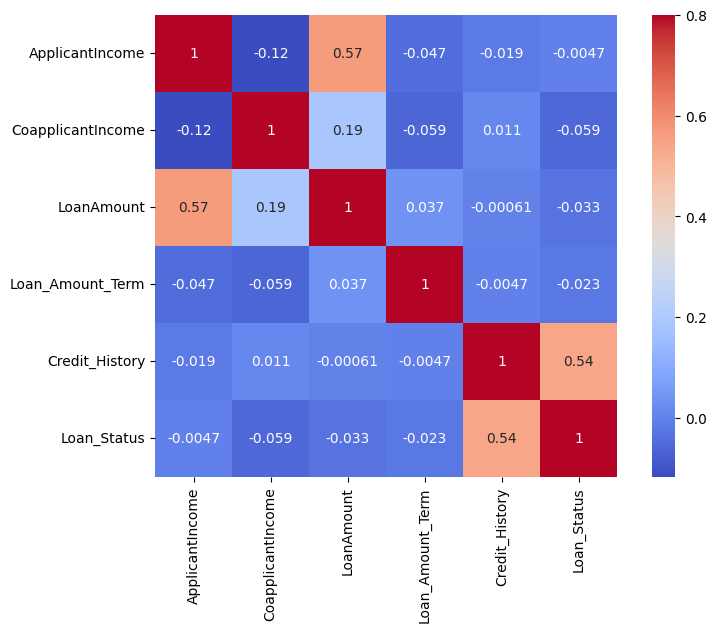

In [ ]:
num_df=train_data.select_dtypes(include=['int','float'])
matrix = num_df.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='coolwarm', annot = True)
plt.show()

credit history has more correlation with loan status.applicant income and loan amount is more correlated

---



In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:

numeric_df = train_data.select_dtypes(include=['int', 'float'])

In [ ]:

train_data=train_data.drop('Loan_ID',axis=1)
test_data=test_data.drop('Loan_ID',axis=1)

In [ ]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
X = train_data.drop(columns=['Loan_Status'])
y = train_data['Loan_Status']

In [ ]:
X = pd.get_dummies(X)
train_data=pd.get_dummies(train_data)
test_data=pd.get_dummies(test_data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:

pred_test = model.predict(x_test)
log_accuracy=accuracy_score(y_test,pred_test)
print("logistic regression accuracy is",log_accuracy)

logistic regression accuracy is 0.7621621621621621


In [ ]:
pred_test2 = model.predict(test_data)

In [ ]:
Output = pd.read_csv('/content/sample_submission_49d68Cx.csv')
Output.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
Output.columns

Index(['Loan_ID', 'Loan_Status'], dtype='object')

In [80]:
Output['Loan_Status']=pred_test2
Output['Loan_ID']=test_org['Loan_ID']

In [84]:
Output['Loan_Status'].replace(0, 'N', inplace=True)
Output['Loan_Status'].replace(1, 'Y', inplace=True)

In [72]:
pd.DataFrame(Output, columns=['Loan_ID','Loan_Status']).to_csv('log_reg.csv')

In [73]:
df=pd.read_csv('/content/log_reg.csv')

In [74]:
df.columns

Index(['Unnamed: 0', 'Loan_ID', 'Loan_Status'], dtype='object')

In [75]:

df = df.drop(columns=['Unnamed: 0'])


In [76]:
df.columns

Index(['Loan_ID', 'Loan_Status'], dtype='object')

In [93]:
df.to_csv('output.csv', index=False)

In [96]:
df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
tree_pred = tree_model.predict(x_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
print("Decision Tree Accuracy:", tree_accuracy)

Decision Tree Accuracy: 0.7567567567567568


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_model = RandomForestClassifier()
forest_model.fit(x_train, y_train)
forest_pred = forest_model.predict(x_test)
forest_accuracy = accuracy_score(y_test, forest_pred)
print("Random Forest Accuracy:", forest_accuracy)

Random Forest Accuracy: 0.7891891891891892


In [81]:
pred_test3 = forest_model.predict(test_data)

In [82]:
Output3 = pd.read_csv('/content/sample_submission_49d68Cx.csv')
Output3.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [83]:
Output3['Loan_Status']=pred_test3
Output3['Loan_ID']=test_org['Loan_ID']

In [86]:
Output3['Loan_Status'].replace(0, 'N', inplace=True)
Output3['Loan_Status'].replace(1, 'Y', inplace=True)

In [87]:
pd.DataFrame(Output3, columns=['Loan_ID','Loan_Status']).to_csv('rand_for.csv')

In [90]:
df3=pd.read_csv('/content/rand_for.csv')

In [91]:
df3.columns

Index(['Unnamed: 0', 'Loan_ID', 'Loan_Status'], dtype='object')

In [92]:

df3 = df3.drop(columns=['Unnamed: 0'])


In [94]:
df3.to_csv('output3.csv', index=False)

In [95]:
df3.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [97]:
df3.columns

Index(['Loan_ID', 'Loan_Status'], dtype='object')



```
`# This is formatted as code`
```

random forest is better model